# Model Based Clustering

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.mixture import GaussianMixture

([], <a list of 0 Text major ticklabel objects>)

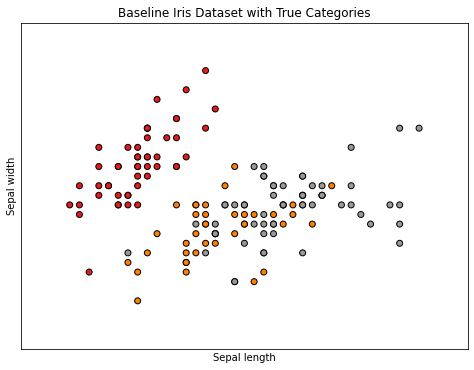

In [16]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Baseline Iris Dataset with True Categories')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

## Gaussian Mixture
### Mixture with 2 Components

In [5]:
gm = GaussianMixture(n_components=2, random_state=0).fit(X)

([], <a list of 0 Text major ticklabel objects>)

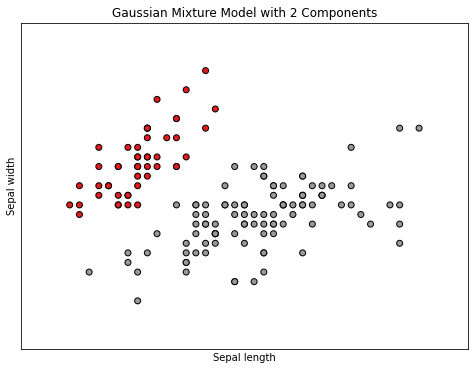

In [17]:
plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=gm.predict(X), cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Gaussian Mixture Model with 2 Components')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

### Mixture with 3 Components

In [10]:
gm_three_components = GaussianMixture(n_components=3, random_state=0).fit(X)

([], <a list of 0 Text major ticklabel objects>)

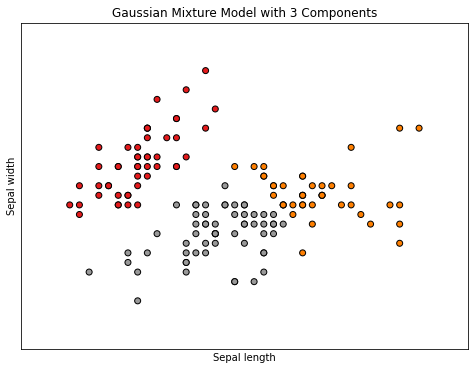

In [18]:
plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=gm_three_components.predict(X), cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Gaussian Mixture Model with 3 Components')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [26]:
gm.aic(X)

473.83150636691425

In [25]:
gm_three_components.aic(X)

483.4022080861015